In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('transaction_data.csv')

In [3]:
train.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
train.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


In [5]:
data_1 = train['TransactionId'].unique()
data_1.shape

(25900,)

In [6]:
data_2 = train['ItemCode'].unique()
data_2.shape

(3407,)

In [7]:
X = np.zeros((2 ,25900))
data_1.sort()

In [9]:
data_2.sort()

In [10]:
X[0] = data_1
X[1] = np.arange(25900)
X = X.T
X = dict(X)


In [11]:
Y = np.zeros((2 ,3407))

In [12]:
Y[0] = data_2
Y[1] = np.arange(3407)
Y = Y.T
Y = dict(Y)

In [13]:
a = []
for i in train['TransactionId']:
    a.append(X[i])

b=[]
for i in train['ItemCode']:
    b.append(Y[i])

data = ([a , b])
data = np.array(data)
data = data.T
data.shape

(1083818, 2)

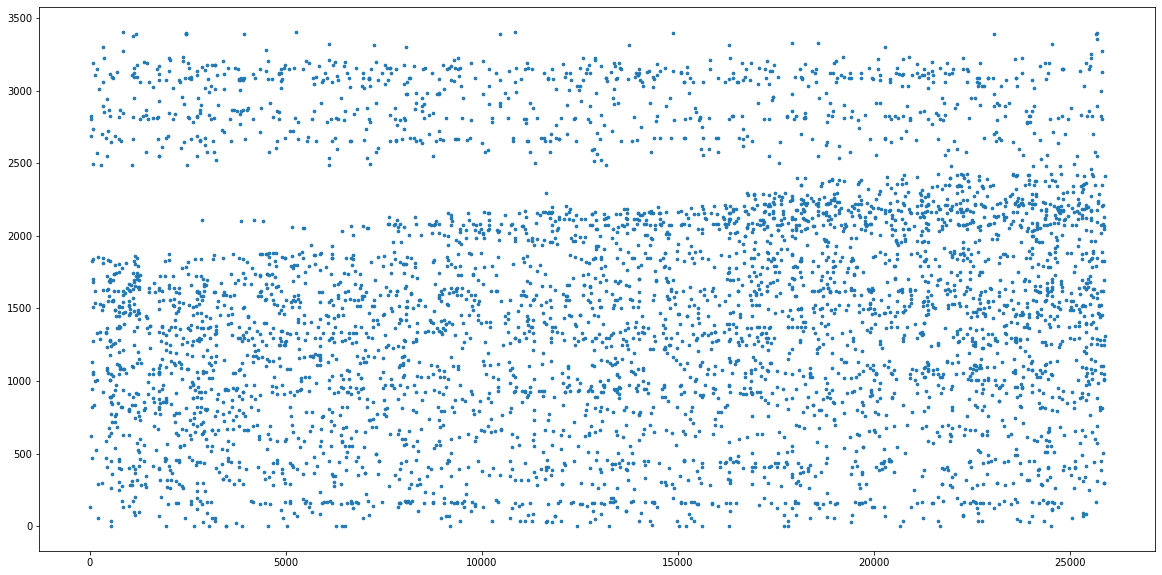

In [14]:
plt.figure(figsize=(20,10))
a = np.array(a)
b = np.array(b)
plt.scatter(a[:5000], b[:5000], s=7)

In [15]:
center = np.zeros((2 , 3407))
center[1] = np.arange(3407)
for i in range(3407):
    center[0,i] = 7*i
center = center.T

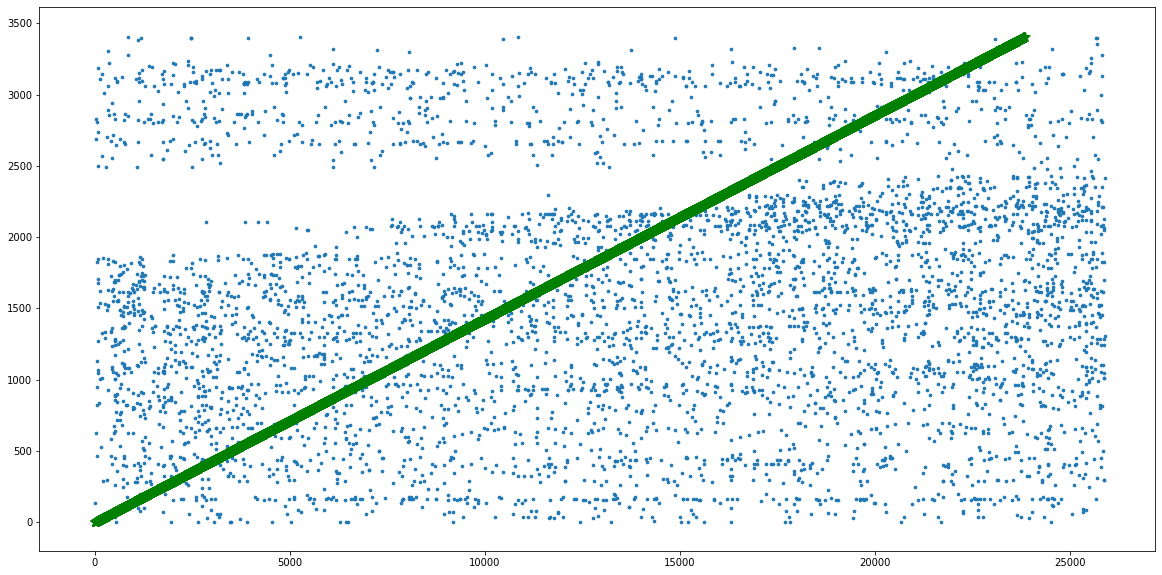

In [17]:
# Number of clusters
k = 3407
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.figure(figsize=(20,10))
plt.scatter(data[:5000,0], data[:5000,1], s=7)
plt.scatter(center[:,0], center[:,1], marker='*', c='g', s=100 )

In [18]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = np.copy(center) # Store new centers


In [34]:
while error !=0 :
    # Measure the distance to every center
    distance = np.zeros((k,1))
    clusters = []
    for i in range(n):
        distances = np.linalg.norm(centers_new - data[i], axis=1)
        clusters.append(np.argmin(distances))
    # Assign all training data to closest center
    pda = pd.DataFrame({"A": np.arange(1083818) , "B" : clusters})

    centers_old = np.copy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        temp = pda[pda["B"] == i]["A"].index
        dataset = []
        if temp.shape[0] == 0 :
            centers_new[i] = centers_old[i]
            continue
        else:
            for j in range(temp.shape[0]):
                dataset.append(data[temp[j]])
            dataset = np.array(dataset)
            centers_new[i] = np.mean(dataset, axis=0)
        error = np.linalg.norm(centers_new - centers_old)

In [37]:
centers_new

array([[1.77500000e+01, 1.87500000e+01],
       [8.91176471e+01, 2.23529412e+01],
       [3.10058824e+02, 3.70441176e+01],
       ...,
       [2.48804506e+04, 1.33946809e+03],
       [2.51018681e+04, 1.75382381e+03],
       [2.56693171e+04, 2.04182510e+03]])

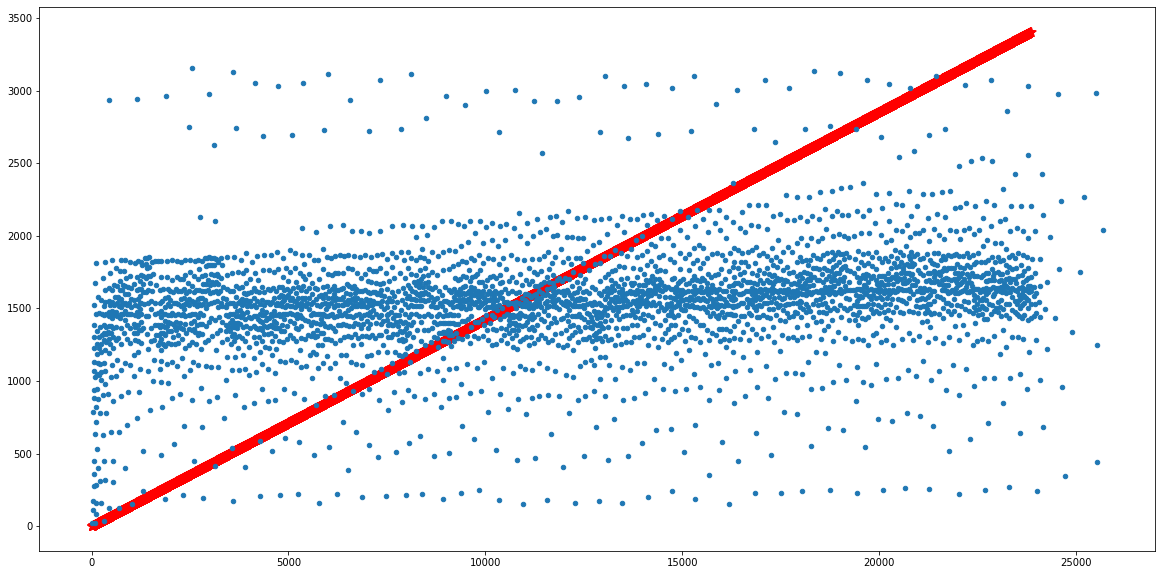

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(center[:,0], center[:,1], marker='*', c='r', s=100 )
plt.scatter(centers_new[:,0], centers_new[:,1], s=20 )

In [51]:
def Predict(A):
    simp_code = Y[A]
    x = np.copy(centers_new[:,0])
    y = np.copy(centers_new[:,1])
    temp = np.argmin(np.abs(y - simp_code))
    trans = (x[temp])
    x[temp] = 100000
    first = (np.argmin(np.abs(x - trans)))
    x[first] = 100000
    second = (np.argmin(np.abs(x - trans)))
    prediction = np.array([int(A),data_2[int(y[first])],data_2[int(y[second])]])
    return prediction 

In [55]:
Predict(1733592)

array([1733592,  477120,  468951], dtype=int64)

In [85]:
def Itemname(value):
    ind = train[train['ItemCode'] == int(value)]['ItemDescription'].index[0]
    name = train['ItemDescription'][ind]
    return name

In [97]:
Itemname(465549)

'FAMILY ALBUM WHITE PICTURE FRAME'

In [86]:
Solution = np.zeros([3407,3])
for i in range(3407):
    Solution[i] = Predict(data_2[i])

In [87]:
Solution

array([[-1.000000e+00,  4.564350e+05,  4.337130e+05],
       [ 4.200000e+01,  4.564350e+05,  4.337130e+05],
       [ 6.300000e+01,  4.564350e+05,  4.337130e+05],
       ...,
       [ 1.894431e+06,  4.780020e+05,  4.738650e+05],
       [ 1.894452e+06,  4.780020e+05,  4.738650e+05],
       [ 1.894494e+06,  4.780020e+05,  4.738650e+05]])

In [88]:
Solution[1,2]

433713.0

In [89]:
ItemName = []
Item1 = []
Item2 = []
for i in range(3407):
    ItemName.append(Itemname(int(Solution[i][0])))
    Item1.append(Itemname(int(Solution[i][1])))
    Item2.append(Itemname(int(Solution[i][2])))

In [99]:
Answer = pd.DataFrame({"ItemCode":Solution[:,0],"Itemdescription":ItemName,"Prediction1":Solution[:,1],"Description1":Item1,"Prediction2":Solution[:,2],"Description2":Item2})

In [100]:
Answer.to_csv("Predictions.csv",index = False)

In [102]:
Answer.head()

,ItemCode,Itemdescription,Prediction1,Description1,Prediction2,Description2
0,-1.0,POSTAGE,456435.0,TWO DOOR CURIO CABINET,433713.0,CHERRY BLOSSOM LUGGAGE TAG
1,42.0,CARRIAGE,456435.0,TWO DOOR CURIO CABINET,433713.0,CHERRY BLOSSOM LUGGAGE TAG
2,63.0,BOXED GLASS ASHTRAY,456435.0,TWO DOOR CURIO CABINET,433713.0,CHERRY BLOSSOM LUGGAGE TAG
3,84.0,HAYNES CAMPER SHOULDER BAG,456435.0,TWO DOOR CURIO CABINET,433713.0,CHERRY BLOSSOM LUGGAGE TAG
4,1155.0,NaN,456435.0,TWO DOOR CURIO CABINET,433713.0,CHERRY BLOSSOM LUGGAGE TAG
